In [1]:
# Instalar pycountry la primera vez. Tened en cuenta pip3. Desanotar.
!pip install pycountry


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import os
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
CWD = os.getcwd()
DATA_PATH = r'Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\agenda2030\data'
ruta_data = os.path.join(CWD, 'data')


In [4]:
archivos_excel = [archivo for archivo in os.listdir(ruta_data) if archivo.endswith('.xlsx')]
lista_dataframes = []
# Iterar sobre cada archivo y cargarlo como DataFrame
for archivo in archivos_excel:
    nombre_variable = os.path.splitext(archivo)[0]  # Utiliza el nombre del archivo (sin extensión) como nombre de la variable
    ruta_completa = os.path.join(ruta_data, archivo)

    
    # Asigna el DataFrame directamente a una variable con el mismo nombre que el archivo
    globals()[nombre_variable] = pd.read_excel(ruta_completa)

    # Creamos una lista con todos los dataframes
    lista_dataframes.append(globals()[nombre_variable])
    
    # Añade las columnas año y sexo
    año, sexo = nombre_variable.split('_')[1:]
    globals()[nombre_variable]['Año'] = año
    globals()[nombre_variable]['Sexo'] = sexo

#Creamos el dataframe con todos los datos
df = pd.concat(lista_dataframes, ignore_index=True)


In [5]:
df['Año'] = df['Año'].astype('int')

In [6]:
import pycountry 
def get_country_code(columna): #Creamos una función para conseguir el código de dos letras de cada país
    country_info = pycountry.countries.get(name=columna)
    if country_info:
        return country_info.alpha_2
    else:
        return 'EU'

In [7]:
df['Pais_code'] = df['Geographic region\Individual indicators used to compute the Gender Equality Index'].apply(get_country_code)
#Llamamos a la función pasándole la columna donde está el país

In [8]:
GEI_PATH = r'/Users/jazz/Desktop/DSC2023/CAPSTONE - NIJA/agenda2030/agenda2030/data_gei/'
df_gei = pd.read_excel(os.path.join(GEI_PATH, 'gender-equality-index.xlsx'))

In [9]:
# Cambiamos los valores EL asignados para Grecia, por GR
df_gei['Country'] = df_gei['Country'].replace('EL', 'GR')

In [10]:
# Añadimos la columna GEI al dataframe
df1 = pd.merge(df, df_gei, left_on=['Pais_code', 'Año'], right_on=['Country', 'Index year'], how='left')

In [11]:
df1.to_excel(r'C:\Users\andre\OneDrive\Documentos\BOOTCAMP\Capstone Project\agenda2030\df1.xlsx', index=False)

In [12]:
df1.head()

,Geographic region\Individual indicators used to compute the Gender Equality Index,"FTE employment rate (%, 15+ population)","Duration of working life (years, 15+ population)","Employed people in Education, Human Health and Social Work activities (%, 15+ employed)","Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)","Career Prospects Index (points, 0-100)","Mean monthly earnings (PPS, working population)","Mean equivalised net income (PPS, 16+ population)","At-risk-of-poverty rate (%, 16+ population)",S20/S80 income quintile share (16+ population),...,"People who don’t smoke and are not involved in harmful drinking (%, 16+ population)","People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)","Population with unmet needs for medical examination (%, 16+ population)","People with unmet needs for dental examination (%, 16+ population)",Año,Sexo,Pais_code,Index year,Country,Gender Equality Index
0,Austria,42,33,26,36,64,1926,21738,15,23,...,65,51,2,5,2013,women,AT,2013,AT,58.669621
1,Belgium,37,30,38,30,66,2460,18790,14,26,...,68,29,1,3,2013,women,BE,2013,BE,69.255331
2,Bulgaria,42,30,19,20,66,717,6791,22,17,...,68,9,15,15,2013,women,BG,2013,BG,55.038562
3,Cyprus,51,33,18,17,53,1976,20930,18,20,...,81,33,7,13,2013,women,CY,2013,CY,48.986893
4,Czechia,43,30,24,11,61,1124,10737,9,29,...,73,30,3,4,2013,women,CZ,2013,CZ,55.569285


In [13]:
# Eliminamos columnas AÑO, PAIS_CODE
# Modificar nombre columnas con un diccionario

In [14]:
print('Cantidad de Filas y columnas:',df1.shape)
print('Nombre columnas:',df1.columns)

Cantidad de Filas y columnas: (392, 38)
Nombre columnas: Index(['Geographic region\Individual indicators used to compute the Gender Equality Index',
       'FTE employment rate (%,  15+ population)',
       'Duration of working life (years, 15+ population)',
       'Employed people in Education, Human Health and Social Work activities (%, 15+ employed)',
       'Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)',
       'Career Prospects Index (points, 0-100)',
       'Mean monthly earnings (PPS, working population)',
       'Mean equivalised net income (PPS, 16+ population)',
       'At-risk-of-poverty rate (%, 16+ population)',
       'S20/S80 income quintile share (16+ population)',
       'Graduates of tertiary education (%, 15+ population)',
       'People participating in formal or non-formal education and training (%, 15+ population)',
       'Tertiary students in the fields of Education, Health and Welfare, Human

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 38 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   Geographic region\Individual indicators used to compute the Gender Equality Index                                                      392 non-null    object 
 1   FTE employment rate (%,  15+ population)                                                                                               392 non-null    int64  
 2   Duration of working life (years, 15+ population)                                                                                       392 non-null    int64  
 3   Employed people in Education, Human Health and Social Work activities 

In [16]:
df1.describe()

,"FTE employment rate (%, 15+ population)","Duration of working life (years, 15+ population)","Employed people in Education, Human Health and Social Work activities (%, 15+ employed)","Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)","Career Prospects Index (points, 0-100)","Mean monthly earnings (PPS, working population)","Mean equivalised net income (PPS, 16+ population)","At-risk-of-poverty rate (%, 16+ population)",S20/S80 income quintile share (16+ population),"Graduates of tertiary education (%, 15+ population)",...,"Self-perceived health, good or very good (%, 16+ population)",Life expectancy in absolute value at birth (years),Healthy life years in absolute value at birth (years),"People who don’t smoke and are not involved in harmful drinking (%, 16+ population)","People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)","Population with unmet needs for medical examination (%, 16+ population)","People with unmet needs for dental examination (%, 16+ population)",Año,Index year,Gender Equality Index
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,...,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,50.359694,35.359694,18.012755,26.250000,62.857143,2072.214286,17278.40051,20.869898,25.665816,25.053571,...,66.772959,79.780612,61.933673,62.451531,37.571429,5.206633,5.750000,2018.142857,2018.142857,63.312071
std,9.116787,3.875387,11.727396,10.936167,5.110543,731.696749,6556.50708,17.881420,15.203582,7.616424,...,10.054683,4.220015,4.877600,11.956130,13.310189,4.261366,4.140592,3.047787,3.047787,8.698087
min,29.000000,22.000000,3.000000,11.000000,51.000000,633.000000,4196.00000,7.000000,12.000000,10.000000,...,38.000000,68.000000,51.000000,35.000000,6.000000,0.000000,0.000000,2013.000000,2013.000000,48.614853
25%,43.000000,33.000000,7.000000,18.000000,60.750000,1463.000000,11479.00000,13.000000,18.000000,19.000000,...,62.000000,78.000000,58.000000,53.000000,29.000000,2.000000,3.000000,2015.000000,2015.000000,55.781477
50%,50.000000,36.000000,14.000000,24.000000,64.000000,2021.000000,17788.50000,16.000000,22.000000,25.000000,...,69.000000,80.000000,62.000000,63.000000,36.000000,4.000000,5.000000,2019.000000,2019.000000,62.154167
75%,58.000000,38.000000,27.000000,33.000000,66.000000,2657.000000,22331.25000,20.000000,26.000000,30.000000,...,73.000000,83.000000,65.000000,72.000000,47.000000,7.000000,7.000000,2021.000000,2021.000000,70.153497
max,67.000000,43.000000,44.000000,56.000000,73.000000,3625.000000,39265.00000,90.000000,84.000000,45.000000,...,84.000000,87.000000,75.000000,85.000000,75.000000,22.000000,22.000000,2022.000000,2022.000000,83.946452


In [17]:
print(list(df1.columns))

['Geographic region\\Individual indicators used to compute the Gender Equality Index', 'FTE employment rate (%,  15+ population)', 'Duration of working life (years, 15+ population)', 'Employed people in Education, Human Health and Social Work activities (%, 15+ employed)', 'Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)', 'Career Prospects Index (points, 0-100)', 'Mean monthly earnings (PPS, working population)', 'Mean equivalised net income (PPS, 16+ population)', 'At-risk-of-poverty rate (%, 16+ population)', 'S20/S80 income quintile share (16+ population)', 'Graduates of tertiary education (%, 15+ population)', 'People participating in formal or non-formal education and training (%, 15+ population)', 'Tertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary students) (%, 15+ population)', 'People caring for and educating their children or grandchildren, elderly or people with d

In [18]:
df1.head()

,Geographic region\Individual indicators used to compute the Gender Equality Index,"FTE employment rate (%, 15+ population)","Duration of working life (years, 15+ population)","Employed people in Education, Human Health and Social Work activities (%, 15+ employed)","Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)","Career Prospects Index (points, 0-100)","Mean monthly earnings (PPS, working population)","Mean equivalised net income (PPS, 16+ population)","At-risk-of-poverty rate (%, 16+ population)",S20/S80 income quintile share (16+ population),...,"People who don’t smoke and are not involved in harmful drinking (%, 16+ population)","People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)","Population with unmet needs for medical examination (%, 16+ population)","People with unmet needs for dental examination (%, 16+ population)",Año,Sexo,Pais_code,Index year,Country,Gender Equality Index
0,Austria,42,33,26,36,64,1926,21738,15,23,...,65,51,2,5,2013,women,AT,2013,AT,58.669621
1,Belgium,37,30,38,30,66,2460,18790,14,26,...,68,29,1,3,2013,women,BE,2013,BE,69.255331
2,Bulgaria,42,30,19,20,66,717,6791,22,17,...,68,9,15,15,2013,women,BG,2013,BG,55.038562
3,Cyprus,51,33,18,17,53,1976,20930,18,20,...,81,33,7,13,2013,women,CY,2013,CY,48.986893
4,Czechia,43,30,24,11,61,1124,10737,9,29,...,73,30,3,4,2013,women,CZ,2013,CZ,55.569285


In [19]:
list_columns = ['Geographic region\\Individual indicators used to compute the Gender Equality Index',
'FTE employment rate (%,  15+ population)',
'Duration of working life (years, 15+ population)',
'Employed people in Education, Human Health and Social Work activities (%, 15+ employed)',
'Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)',
'Career Prospects Index (points, 0-100)',
'Mean monthly earnings (PPS, working population)',
'Mean equivalised net income (PPS, 16+ population)',
'At-risk-of-poverty rate (%, 16+ population)',
'S20/S80 income quintile share (16+ population)',
'Graduates of tertiary education (%, 15+ population)',
'People participating in formal or non-formal education and training (%, 15+ population)',
'Tertiary students in the fields of Education, Health and Welfare, Humanities and Art (tertiary students) (%, 15+ population)',
'People caring for and educating their children or grandchildren, elderly or people with disabilities, every day (% 18+ population)',
'People doing cooking and/or housework, every day (%, 18+ population)',
'Workers doing sporting, cultural or leisure activities outside of their home, at least daily or several times a week (%, 15+ workers)',
'Workers involved in voluntary or charitable activities, at least once a month (%, 15+ workers)',
'Share of ministers (%)',
'Share of members of parliament (%)',
'Share of members of regional assemblies (%)',
'Share of members of boards in largest quoted companies, supervisory board or board of directors (%)',
'Share of board members of central bank (%)',
'Share of board members of research funding organisations (%)',
'Share of board members of publically owned broadcasting organisations (%)',
'Share of members of highest decision making body of the national Olympic sport organisations (%)',
'Self-perceived health, good or very good (%, 16+ population)',
'Life expectancy in absolute value at birth (years)',
'Healthy life years in absolute value at birth (years)',
'People who don’t smoke and are not involved in harmful drinking (%, 16+ population)',
'People doing physical activities and/or consuming fruits and vegetables (%, 16+ population)',
'Population with unmet needs for medical examination (%, 16+ population)',
'People with unmet needs for dental examination (%, 16+ population)',
'Año',
'Sexo',
'Pais_code',
'Index year',
'Country',
'Gender Equality Index']


In [20]:
#Acortamos los nombres de las variables para que sea más fácil trabajar con ellas. 

In [21]:
nuevos_nombres = ['GR\\IIutctGEI',
'FER',
'DWL',
'EPEHHASWA',
'ATTAOTDWH',
'CPI',
'MME',
'MENI',
'ARP',
'S20/S80IQ',
'GTE',
'PFNFEAT',
'TSEFEHWA',
'PCAEPTCGEOPD',
'PDCAHE',
'WDSCLOTHAODOSTW',
'WIVORCAAOM',
'SOM',
'SOMP',
'SOMRA',
'SOMBILQCSBOD',
'SOBMCB',
'SOBMRFO',
'SOBMPBO',
'SMDMBNO',
'SPHGVO',
'LEIAVAB',
'HLYIAAB',
'PWDSANII',
'PDPAACFV',
'PWUNFME',
'PWUNFDE',
'Año',
'Sexo',
'Pais_code',
'Index year',
'Country',
'GEI']

In [22]:
df1.columns = nuevos_nombres

In [23]:
df1.head()

,GR\IIutctGEI,FER,DWL,EPEHHASWA,ATTAOTDWH,CPI,MME,MENI,ARP,S20/S80IQ,...,PWDSANII,PDPAACFV,PWUNFME,PWUNFDE,Año,Sexo,Pais_code,Index year,Country,GEI
0,Austria,42,33,26,36,64,1926,21738,15,23,...,65,51,2,5,2013,women,AT,2013,AT,58.669621
1,Belgium,37,30,38,30,66,2460,18790,14,26,...,68,29,1,3,2013,women,BE,2013,BE,69.255331
2,Bulgaria,42,30,19,20,66,717,6791,22,17,...,68,9,15,15,2013,women,BG,2013,BG,55.038562
3,Cyprus,51,33,18,17,53,1976,20930,18,20,...,81,33,7,13,2013,women,CY,2013,CY,48.986893
4,Czechia,43,30,24,11,61,1124,10737,9,29,...,73,30,3,4,2013,women,CZ,2013,CZ,55.569285


In [24]:
mapeo_variables = {}

# Verificación de longitudes iguales entre las listas de variables antiguas y nuevas
if len(list_columns) == len(nuevos_nombres):
    for i in range(len(list_columns)):
        mapeo_variables[list_columns[i]] = nuevos_nombres[i]
else:
    print("Las listas de variables antiguas y nuevas no tienen la misma longitud")

# Imprimir el diccionario creado
print("Diccionario de mapeo de variables:")
print(mapeo_variables)

Diccionario de mapeo de variables:
{'Geographic region\\Individual indicators used to compute the Gender Equality Index': 'GR\\IIutctGEI', 'FTE employment rate (%,  15+ population)': 'FER', 'Duration of working life (years, 15+ population)': 'DWL', 'Employed people in Education, Human Health and Social Work activities (%, 15+ employed)': 'EPEHHASWA', 'Ability to take an hour or two off during working hours to take care of personal or family matters (%, 15+ workers)': 'ATTAOTDWH', 'Career Prospects Index (points, 0-100)': 'CPI', 'Mean monthly earnings (PPS, working population)': 'MME', 'Mean equivalised net income (PPS, 16+ population)': 'MENI', 'At-risk-of-poverty rate (%, 16+ population)': 'ARP', 'S20/S80 income quintile share (16+ population)': 'S20/S80IQ', 'Graduates of tertiary education (%, 15+ population)': 'GTE', 'People participating in formal or non-formal education and training (%, 15+ population)': 'PFNFEAT', 'Tertiary students in the fields of Education, Health and Welfare,

In [25]:
#Vamos a dividir nuestras variables por tipo en listas.

In [26]:
def obtener_lista_variables(dataset, target):
    lista_numericas = []
    lista_boolean = []
    lista_categoricas = []

    for i in dataset.columns:
        if (dataset[i].dtype.kind in ['i', 'f']) and (i != target) and (len(dataset[i].unique()) != 2):
            lista_numericas.append(i)
        elif (dataset[i].dtype == bool) and (i != target):
            lista_boolean.append(i)
        elif (dataset[i].dtype.kind == 'O') and (i != target):
            lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas


lista_numericas, lista_boolean, lista_categoricas = obtener_lista_variables(df1, 'target_column')


print("Variables numéricas:", lista_numericas)
print("Variables booleanas:", lista_boolean)
print("Variables categóricas:", lista_categoricas)

Variables numéricas: ['FER', 'DWL', 'EPEHHASWA', 'ATTAOTDWH', 'CPI', 'MME', 'MENI', 'ARP', 'S20/S80IQ', 'GTE', 'PFNFEAT', 'TSEFEHWA', 'PCAEPTCGEOPD', 'PDCAHE', 'WDSCLOTHAODOSTW', 'WIVORCAAOM', 'SOM', 'SOMP', 'SOMRA', 'SOMBILQCSBOD', 'SOBMCB', 'SOBMRFO', 'SOBMPBO', 'SMDMBNO', 'SPHGVO', 'LEIAVAB', 'HLYIAAB', 'PWDSANII', 'PDPAACFV', 'PWUNFME', 'PWUNFDE', 'Año', 'Index year', 'GEI']
Variables booleanas: []
Variables categóricas: ['GR\\IIutctGEI', 'Sexo', 'Pais_code', 'Country']


In [27]:
lista_numericas

['FER',
 'DWL',
 'EPEHHASWA',
 'ATTAOTDWH',
 'CPI',
 'MME',
 'MENI',
 'ARP',
 'S20/S80IQ',
 'GTE',
 'PFNFEAT',
 'TSEFEHWA',
 'PCAEPTCGEOPD',
 'PDCAHE',
 'WDSCLOTHAODOSTW',
 'WIVORCAAOM',
 'SOM',
 'SOMP',
 'SOMRA',
 'SOMBILQCSBOD',
 'SOBMCB',
 'SOBMRFO',
 'SOBMPBO',
 'SMDMBNO',
 'SPHGVO',
 'LEIAVAB',
 'HLYIAAB',
 'PWDSANII',
 'PDPAACFV',
 'PWUNFME',
 'PWUNFDE',
 'Año',
 'Index year',
 'GEI']

In [28]:
lista_categoricas

['GR\\IIutctGEI', 'Sexo', 'Pais_code', 'Country']

In [29]:
lista_boolean

[]

In [30]:
#Vamos a estudiar nuestras variables de manera individual. 

/var/folders/6_/tvvyxcn96x1gl6sbgpcc6clr0000gn/T/ipykernel_19394/1353396863.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right', fontsize=8)
/var/folders/6_/tvvyxcn96x1gl6sbgpcc6clr0000gn/T/ipykernel_19394/1353396863.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right', fontsize=8)
/var/folders/6_/tvvyxcn96x1gl6sbgpcc6clr0000gn/T/ipykernel_19394/1353396863.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right', fontsize=8)
/var/folders/6_/tvvyxcn96x1gl6sbgpcc6clr0000gn/T/ipykernel_19394/1353396863.py:10: UserWarning: set_ticklabel

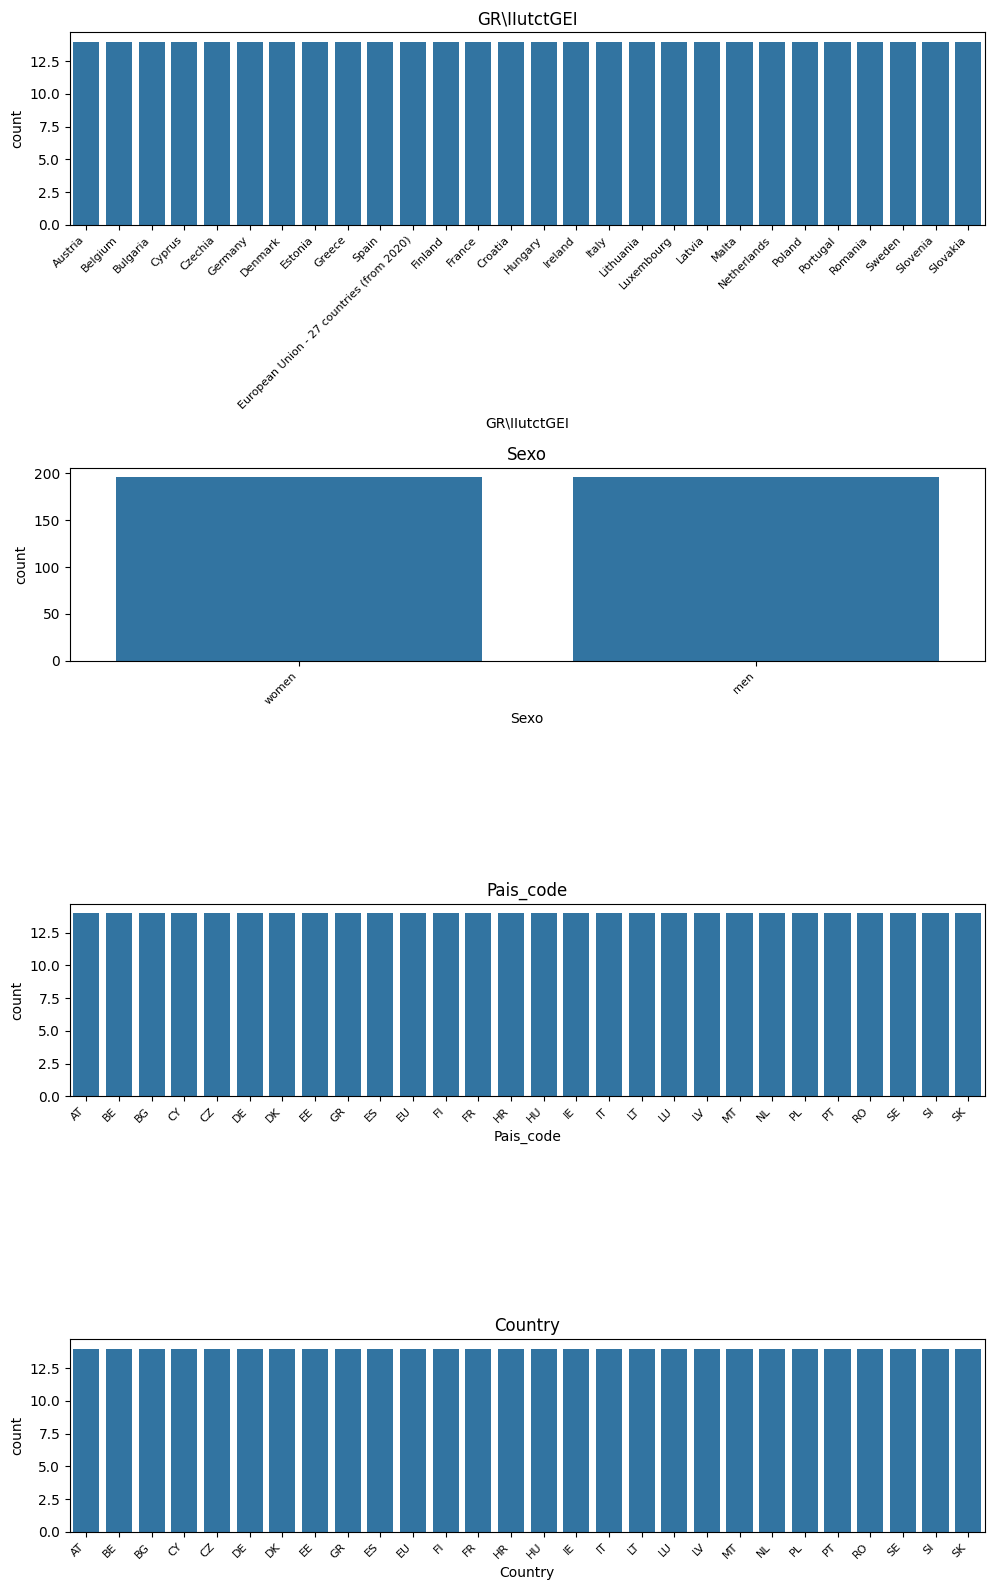

In [31]:
#lista_categoricas
fig_height = len(lista_categoricas) * 4  
fig, ax = plt.subplots(nrows=len(lista_categoricas), ncols=1, figsize=(10, fig_height))
fig.subplots_adjust(hspace=5.0)

for i, col in enumerate(lista_categoricas):
    sns.countplot(x=col, data=df1, ax=ax[i])
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', labelrotation=45)  
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45, ha='right', fontsize=8)  

plt.tight_layout()  
plt.show()

In [32]:
#Descripción categóricas
descripcion_categoricas = categoricas_df.describe()
categoricas_df = df1[lista_categoricas]
print(descripcion_categoricas)


NameError: name 'categoricas_df' is not defined

In [ ]:
#Descripción numéricas
descripcion_numericas = numericas_df.describe()
numericas_df = df1[lista_numericas]
print(descripcion_numericas)

              FER         DWL   EPEHHASWA   ATTAOTDWH         CPI  \
count  392.000000  392.000000  392.000000  392.000000  392.000000   
mean    50.359694   35.359694   18.012755   26.250000   62.857143   
std      9.116787    3.875387   11.727396   10.936167    5.110543   
min     29.000000   22.000000    3.000000   11.000000   51.000000   
25%     43.000000   33.000000    7.000000   18.000000   60.750000   
50%     50.000000   36.000000   14.000000   24.000000   64.000000   
75%     58.000000   38.000000   27.000000   33.000000   66.000000   
max     67.000000   43.000000   44.000000   56.000000   73.000000   

               MME         MENI         ARP   S20/S80IQ         GTE  \
count   392.000000    392.00000  392.000000  392.000000  392.000000   
mean   2072.214286  17278.40051   20.869898   25.665816   25.053571   
std     731.696749   6556.50708   17.881420   15.203582    7.616424   
min     633.000000   4196.00000    7.000000   12.000000   10.000000   
25%    1463.000000  114

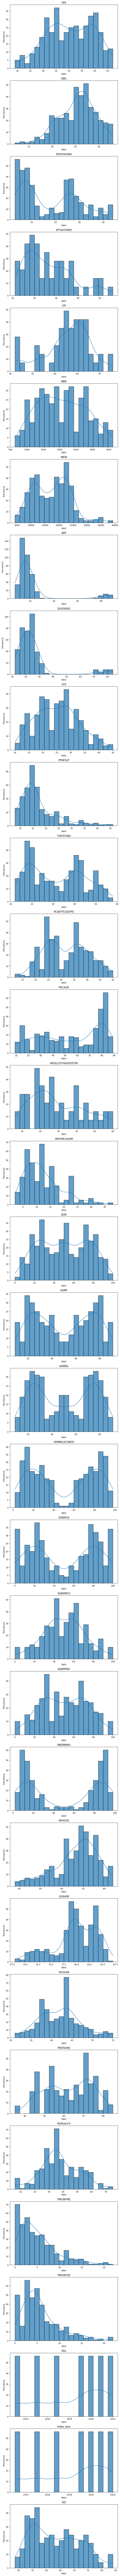

In [ ]:
#lista_numericas
num_cols = len(lista_numericas)
fig, ax = plt.subplots(nrows=num_cols, ncols=1, figsize=(8, 5*num_cols))

for i, col in enumerate(lista_numericas):
    sns.histplot(df1[col], bins=20, kde=True, alpha=0.7, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xlabel('Valor')
    ax[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

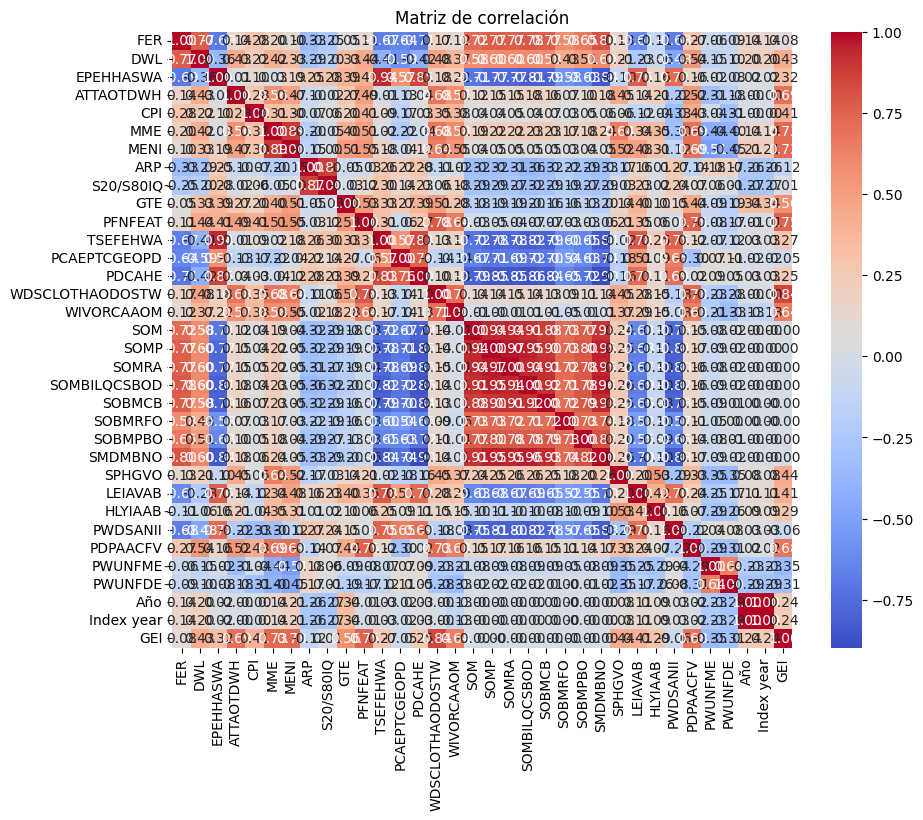

In [ ]:
#Vamos a ver ahora la correlación con estos nuevos nombres
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])

# Calculamos la correlación entre las columnas numéricas
corr = numeric_columns.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()